# HR - Attrition Analytics

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

This dataset is taken from kaggle https://www.kaggle.com/ludobenistant/hr-analytics

Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left


### Loading Datasets and exploring metadata

In [1]:
import pandas as pd
import numpy as np

In [3]:
hr_df = pd.read_csv('HR_comma_sep.csv')

In [4]:
.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
5591,0.70,0.55,4,227,3,0,0,0,sales,medium
11153,0.37,0.69,2,146,3,0,0,0,support,medium
1484,0.44,0.56,2,142,3,0,1,0,hr,low
11328,0.50,0.52,2,178,2,0,0,0,support,medium
13302,0.86,0.82,4,212,2,0,0,0,product_mng,medium
14355,0.84,0.99,4,267,5,0,1,0,product_mng,low
14974,0.36,0.54,2,153,3,0,1,0,accounting,medium
2496,0.58,0.69,3,146,4,0,0,0,support,low
13025,0.88,0.61,4,177,4,1,0,0,support,low
11487,0.75,0.53,4,224,4,1,0,0,support,medium


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Encoding Categorical Features

#### Exploring Categorical Features

In [13]:
hr_df.dept.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
hr_df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

- OHE - One Hot Encoding 
- Dummy Variable Creation

In [15]:
salary_dict = { 'low' : 1,
                'medium': 2,
                'high': 4}

In [16]:
hr_df['salary'] = hr_df.salary.map(salary_dict)

In [17]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
9639,0.99,0.47,3,152,5,0,0,0,sales,1
9491,0.45,0.42,4,140,2,0,0,0,sales,1
3425,0.89,0.54,3,214,2,0,0,0,product_mng,2
8268,0.73,0.74,4,214,3,0,0,0,sales,4
12906,0.60,0.59,4,201,3,0,0,0,sales,2
3311,0.82,0.75,3,230,4,1,0,0,accounting,2
7492,0.15,0.98,2,96,2,0,0,0,sales,4
9172,0.29,0.43,6,175,3,0,0,0,sales,1
5201,0.36,0.73,3,187,3,0,0,0,sales,2
3174,0.71,0.64,4,189,3,0,0,0,technical,2


In [18]:
hr_encoded_df = pd.get_dummies( hr_df,
                                columns = ['dept'] )

In [19]:
hr_encoded_df.head(5)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [20]:
hr_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
 9   dept_IT                14999 non-null  uint8  
 10  dept_RandD             14999 non-null  uint8  
 11  dept_accounting        14999 non-null  uint8  
 12  dept_hr                14999 non-null  uint8  
 13  dept_management        14999 non-null  uint8  
 14  dept_marketing         14999 non-null  uint8  
 15  de

### Setting X and Y Variables

In [21]:
hr_encoded_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [22]:
X_features = list(hr_encoded_df.columns)

In [23]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical']

In [24]:
X_features.remove('left')

In [58]:
X_features

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'salary',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical']

### Building a model using only one variable
#### Setting X & y variable

In [26]:
X = hr_encoded_df[['satisfaction_level']]
y = hr_encoded_df.left

In [27]:
X[0:2]

,satisfaction_level
0,0.38
1,0.80


In [28]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [31]:
X_train.shape

(11999, 1)

In [32]:
X_test.shape

(3000, 1)

### Build a Model: V1

Logistic Regression Model - Sigmoid function

<img src="Logistic.png" alt="ML Algorithms" width="600"/>

<img src="Logistic2.png" alt="Logistic Regression" width="800"/>

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [35]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

### Finding Parameters

In [36]:
logreg_v1.intercept_

array([0.8983167])

In [37]:
logreg_v1.coef_

array([[-3.71491759]])

In [38]:
dict( zip( X_features, np.round(logreg_v1.coef_[0], 2) ) )

{'satisfaction_level': -3.71}

In [39]:
sl_list = np.arange(0.0, 1.0, 0.05)

In [40]:
sl_list

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [41]:
sl_probs = [(1.0 / (1.0 + np.exp(-(0.89-3.71*x)))) for x in sl_list]

In [42]:
sl_probs_df = pd.DataFrame({'SL': sl_list, 'Prob_Left': sl_probs })

In [43]:
sl_probs_df

,SL,Prob_Left
0,0.00,0.708890
1,0.05,0.669185
2,0.10,0.626914
3,0.15,0.582611
4,0.20,0.536933
5,0.25,0.490626
6,0.30,0.444480
7,0.35,0.399272
8,0.40,0.355718
9,0.45,0.314428


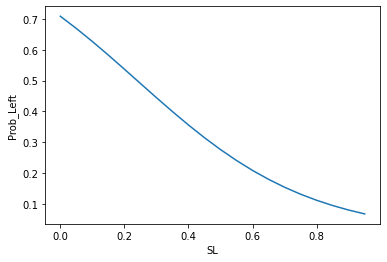

In [44]:
sn.lineplot(data=sl_probs_df, x="SL", y="Prob_Left");

### Building a model with all variables
#### Setting X & y variable

In [50]:
X = hr_encoded_df[X_features]
y = hr_encoded_df.left

In [51]:
X[0:2]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,1,0,0


In [52]:
y[0:2]

0    1
1    1
Name: left, dtype: int64

### Split Dataset into train and test

- Train: 80%
- Test: 20%

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, \
y_train, y_test = train_test_split( X,
                                    y,
                                    test_size = 0.2,
                                    random_state = 100 )

In [55]:
X_train.shape

(11999, 18)

In [56]:
X_test.shape

(3000, 18)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg_v1 = LogisticRegression(random_state = 100, 
                               max_iter = 1000)

In [61]:
logreg_v1.fit( X_train, y_train )

LogisticRegression(max_iter=1000, random_state=100)

### Finding Parameters

In [62]:
logreg_v1.intercept_

array([0.75759457])

In [63]:
logreg_v1.coef_

array([[-3.96253069e+00,  7.10802299e-01, -2.96345834e-01,
         4.47341946e-03,  2.67032094e-01, -1.50131618e+00,
        -1.25195574e+00, -6.01824348e-01,  2.66689097e-03,
        -3.60723163e-01,  2.36294018e-01,  4.22093510e-01,
        -2.85528690e-01,  1.30752462e-01,  2.13872522e-02,
         1.24372556e-01,  2.01243088e-01,  2.26774174e-01]])

In [64]:
dict( zip( X_features, np.round(logreg_v1.coef_[0], 2) ) )

{'satisfaction_level': -3.96,
 'last_evaluation': 0.71,
 'number_project': -0.3,
 'average_montly_hours': 0.0,
 'time_spend_company': 0.27,
 'Work_accident': -1.5,
 'promotion_last_5years': -1.25,
 'salary': -0.6,
 'dept_IT': 0.0,
 'dept_RandD': -0.36,
 'dept_accounting': 0.24,
 'dept_hr': 0.42,
 'dept_management': -0.29,
 'dept_marketing': 0.13,
 'dept_product_mng': 0.02,
 'dept_sales': 0.12,
 'dept_support': 0.2,
 'dept_technical': 0.23}

### Predict on Test Set

- p(y) >= 0.5,  y = 1 (L)
- p(y) < 0.5, y = 0 (NL)

In [65]:
logreg_v1.predict_proba( X_test )

array([[0.91399866, 0.08600134],
       [0.90035058, 0.09964942],
       [0.51749254, 0.48250746],
       ...,
       [0.89980692, 0.10019308],
       [0.96379619, 0.03620381],
       [0.97575031, 0.02424969]])

In [66]:
pred_logreg_v1 = logreg_v1.predict( X_test )

In [67]:
y_logreg_v1 = pd.DataFrame( { "actual": y_test,
                              "predicted": pred_logreg_v1 } )

In [68]:
y_logreg_v1.sample(10, random_state = 20)

,actual,predicted
310,1,1
14670,1,0
1322,1,0
3314,0,0
11348,0,1
12630,1,1
7293,0,0
13600,0,0
4038,0,0
1499,1,0


### Evaluating the model

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_logreg_v1.actual, y_logreg_v1.predicted)

0.787

### Building Confusion Matrix

<img src="confusion_matrix.png" alt="ML Algorithms" width="600"/>

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [72]:
cm = confusion_matrix(y_logreg_v1.actual, y_logreg_v1.predicted, labels = [1,0])

In [73]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['Left', 'Not Left'])

In [75]:
y_test.value_counts()

0    2250
1     750
Name: left, dtype: int64

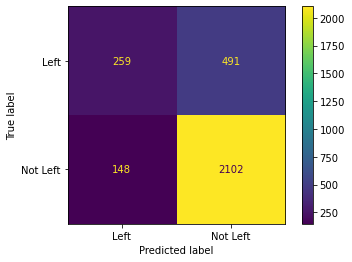

In [74]:
cm_plot.plot();

In [76]:
from sklearn.metrics import recall_score

In [77]:
print(recall_score(y_logreg_v1.actual, y_logreg_v1.predicted))

0.3453333333333333


### KNN Model

In [79]:
import matplotlib.pyplot as plt
import seaborn as sn

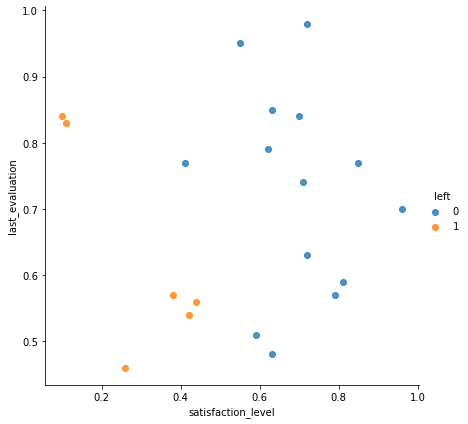

In [80]:
sn.lmplot( data = hr_df.sample(20, random_state = 30),
           x = 'satisfaction_level',
           y = 'last_evaluation',
           hue = 'left',
           fit_reg = False,
           height = 6);

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn_v1 = KNeighborsClassifier(n_neighbors = 10, weights='uniform')

In [83]:
knn_v1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
X_train.shape

(11999, 18)

In [85]:
knn_pred = knn_v1.predict(X_test)

In [86]:
accuracy_score(y_test, knn_pred)

0.945

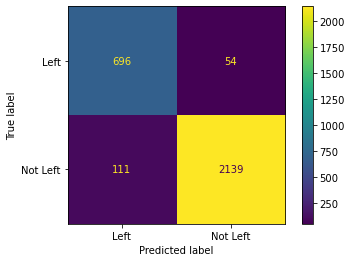

In [87]:
cm = confusion_matrix(y_logreg_v1.actual, knn_pred, labels = [1,0])
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['Left', 'Not Left'])
cm_plot.plot();

In [88]:
from sklearn.metrics import recall_score

In [89]:
recall_score(y_test, knn_pred)

0.928

###  Participant Exercise: 2

- Grid Search
- Find the optimal hyperparameters
    - n_neighbors [5 to 20]
    - weights: ['uniform', 'distance']
- use 'recall' for scoring    
- Print the best params and best score    

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_neighbors': range(5, 20),
          'weights': ['uniform', 'distance']}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(),
                        param_grid=params,
                        cv=10,
                        scoring='recall')

In [ ]:
knn_grid.fit(X_train, y_train)

In [ ]:
knn_grid.best_score_

In [ ]:
knn_grid.best_params_